In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import train, test
from PIL import Image
import pandas as pd
import numpy as np
from convnet import ConvNet

In [2]:
cifar100_root = '../cifar100'
ipc50 = np.loadtxt('./random_ipc_index/cifar100/ipc_50.txt', dtype=int)
ipc50

array([35640, 47103, 38839, ..., 48602, 17907, 37111])

In [3]:
cifar100_train = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=True,
                                            transform=transforms.Compose([
                                                                          transforms.Resize(64),
                                                                          transforms.RandomHorizontalFlip(),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                                        ]))


cifar100_test = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                transforms.Resize(64),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [4]:
batch_size = 8
train_data_loader = DataLoader(cifar100_train, batch_size=batch_size, sampler=SubsetRandomSampler(ipc50))
test_data_loader = DataLoader(cifar100_test, batch_size=batch_size, shuffle=False)

In [5]:
len(train_data_loader)

625

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [7]:
import os

model_name = 'VGG11'
dataset = 'cifar100_ipc50'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
model = torchvision.models.vgg11(num_classes=100).to(device)

In [8]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100, optimizer='sgd', lr=1e-3)

  0%|          | 0/625 [00:00<?, ?it/s]c:\Users\Andrew\envs\CS5340\lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Epoch 1: 100%|██████████| 625/625 [00:12<00:00, 50.52it/s, loss=4.56]


epoch: 1 done, loss: 0.05758659541606903
Acc: 0.0147
[0.001]


Epoch 2: 100%|██████████| 625/625 [00:21<00:00, 29.42it/s, loss=4.35]


epoch: 2 done, loss: 0.05674143508076668
Acc: 0.0168
[0.001]


Epoch 3: 100%|██████████| 625/625 [00:28<00:00, 22.29it/s, loss=4.5] 


epoch: 3 done, loss: 0.05565282702445984
Acc: 0.0212
[0.001]


Epoch 4: 100%|██████████| 625/625 [00:26<00:00, 23.61it/s, loss=4.47]


epoch: 4 done, loss: 0.054150041192770004
Acc: 0.0416
[0.001]


Epoch 5: 100%|██████████| 625/625 [00:27<00:00, 22.76it/s, loss=4.36]


epoch: 5 done, loss: 0.05304432660341263
Acc: 0.0529
[0.001]


Epoch 6: 100%|██████████| 625/625 [00:27<00:00, 22.44it/s, loss=4.59]


epoch: 6 done, loss: 0.05217759683728218
Acc: 0.0632
[0.001]


Epoch 7: 100%|██████████| 625/625 [00:26<00:00, 23.58it/s, loss=4.39]


epoch: 7 done, loss: 0.051395099610090256
Acc: 0.0535
[0.001]


Epoch 8: 100%|██████████| 625/625 [00:26<00:00, 23.60it/s, loss=3.9] 


epoch: 8 done, loss: 0.050602350383996964
Acc: 0.0855
[0.001]


Epoch 9: 100%|██████████| 625/625 [00:28<00:00, 22.23it/s, loss=4.41]


epoch: 9 done, loss: 0.04946988821029663
Acc: 0.0845
[0.001]


Epoch 10: 100%|██████████| 625/625 [00:27<00:00, 22.68it/s, loss=4.52]


epoch: 10 done, loss: 0.04891560599207878
Acc: 0.1071
[0.001]


Epoch 11: 100%|██████████| 625/625 [00:26<00:00, 23.73it/s, loss=3.58]


epoch: 11 done, loss: 0.04801107943058014
Acc: 0.1071
[0.001]


Epoch 12: 100%|██████████| 625/625 [00:28<00:00, 22.12it/s, loss=3.53]


epoch: 12 done, loss: 0.0471845380961895
Acc: 0.1051
[0.001]


Epoch 13: 100%|██████████| 625/625 [00:27<00:00, 22.44it/s, loss=3.41]


epoch: 13 done, loss: 0.04620547220110893
Acc: 0.1274
[0.001]


Epoch 14: 100%|██████████| 625/625 [00:26<00:00, 23.75it/s, loss=3.73]


epoch: 14 done, loss: 0.0453907735645771
Acc: 0.1347
[0.001]


Epoch 15: 100%|██████████| 625/625 [00:28<00:00, 22.25it/s, loss=3.29]


epoch: 15 done, loss: 0.04448258504271507
Acc: 0.142
[0.001]


Epoch 16: 100%|██████████| 625/625 [00:27<00:00, 22.42it/s, loss=3.6] 


epoch: 16 done, loss: 0.043843433260917664
Acc: 0.1412
[0.001]


Epoch 17: 100%|██████████| 625/625 [00:26<00:00, 23.85it/s, loss=3.8] 


epoch: 17 done, loss: 0.04292861372232437
Acc: 0.1709
[0.001]


Epoch 18: 100%|██████████| 625/625 [00:26<00:00, 23.39it/s, loss=3.53]


epoch: 18 done, loss: 0.04177404195070267
Acc: 0.1825
[0.001]


Epoch 19: 100%|██████████| 625/625 [00:27<00:00, 22.42it/s, loss=2.17]


epoch: 19 done, loss: 0.04100624844431877
Acc: 0.1848
[0.001]


Epoch 20: 100%|██████████| 625/625 [00:26<00:00, 23.50it/s, loss=3.08]


epoch: 20 done, loss: 0.040279123932123184
Acc: 0.1864
[0.001]


Epoch 21: 100%|██████████| 625/625 [00:26<00:00, 23.80it/s, loss=2.62]


epoch: 21 done, loss: 0.03909463435411453
Acc: 0.1982
[0.001]


Epoch 22: 100%|██████████| 625/625 [00:28<00:00, 22.13it/s, loss=2.72]


epoch: 22 done, loss: 0.03809544816613197
Acc: 0.1994
[0.001]


Epoch 23: 100%|██████████| 625/625 [00:27<00:00, 23.07it/s, loss=2.31] 


epoch: 23 done, loss: 0.03722783178091049
Acc: 0.2015
[0.001]


Epoch 24: 100%|██████████| 625/625 [00:26<00:00, 23.76it/s, loss=3.72]


epoch: 24 done, loss: 0.03644436597824097
Acc: 0.2116
[0.001]


Epoch 25: 100%|██████████| 625/625 [00:28<00:00, 22.08it/s, loss=1.46]


epoch: 25 done, loss: 0.03472944349050522
Acc: 0.2251
[0.001]


Epoch 26: 100%|██████████| 625/625 [00:27<00:00, 22.55it/s, loss=2.59]


epoch: 26 done, loss: 0.03432825952768326
Acc: 0.2123
[0.001]


Epoch 27: 100%|██████████| 625/625 [00:26<00:00, 23.81it/s, loss=3.59] 


epoch: 27 done, loss: 0.033164944499731064
Acc: 0.2243
[0.001]


Epoch 28: 100%|██████████| 625/625 [00:28<00:00, 21.93it/s, loss=2.55]


epoch: 28 done, loss: 0.03261304646730423
Acc: 0.2391
[0.001]


Epoch 29: 100%|██████████| 625/625 [00:27<00:00, 22.37it/s, loss=3.17] 


epoch: 29 done, loss: 0.0312977209687233
Acc: 0.2219
[0.0001]


Epoch 30: 100%|██████████| 625/625 [00:26<00:00, 23.95it/s, loss=2.49] 


epoch: 30 done, loss: 0.02559475041925907
Acc: 0.2737
[0.0001]


Epoch 31: 100%|██████████| 625/625 [00:27<00:00, 23.14it/s, loss=2.63] 


epoch: 31 done, loss: 0.02306671254336834
Acc: 0.2732
[0.0001]


Epoch 32: 100%|██████████| 625/625 [00:28<00:00, 22.26it/s, loss=3.03] 


epoch: 32 done, loss: 0.022444620728492737
Acc: 0.2787
[0.0001]


Epoch 33: 100%|██████████| 625/625 [00:26<00:00, 23.47it/s, loss=2.08] 


epoch: 33 done, loss: 0.021817278116941452
Acc: 0.277
[0.0001]


Epoch 34: 100%|██████████| 625/625 [00:26<00:00, 23.64it/s, loss=1.18] 


epoch: 34 done, loss: 0.020903659984469414
Acc: 0.2781
[1e-05]


Epoch 35: 100%|██████████| 625/625 [00:28<00:00, 22.01it/s, loss=1.74] 


epoch: 35 done, loss: 0.01997998356819153
Acc: 0.2814
[1e-05]


Epoch 36: 100%|██████████| 625/625 [00:27<00:00, 22.56it/s, loss=1.7]  


epoch: 36 done, loss: 0.01972471922636032
Acc: 0.2805
[1e-05]


Epoch 37: 100%|██████████| 625/625 [00:26<00:00, 23.50it/s, loss=0.98] 


epoch: 37 done, loss: 0.019863508641719818
Acc: 0.2799
[1e-05]


Epoch 38: 100%|██████████| 625/625 [00:28<00:00, 21.96it/s, loss=1.27] 


epoch: 38 done, loss: 0.01945471204817295
Acc: 0.2795
[1.0000000000000002e-06]


Epoch 39: 100%|██████████| 625/625 [00:28<00:00, 22.29it/s, loss=1.2]  


epoch: 39 done, loss: 0.01925751008093357
Acc: 0.2803
[1.0000000000000002e-06]


Epoch 40: 100%|██████████| 625/625 [00:26<00:00, 23.84it/s, loss=0.856]


epoch: 40 done, loss: 0.01965046301484108
Acc: 0.2809
[1.0000000000000002e-06]


Epoch 41: 100%|██████████| 625/625 [00:26<00:00, 23.36it/s, loss=1.54] 


epoch: 41 done, loss: 0.01964588463306427
Acc: 0.2809
[1.0000000000000002e-06]


Epoch 42: 100%|██████████| 625/625 [00:28<00:00, 22.01it/s, loss=1.82] 


epoch: 42 done, loss: 0.019434146583080292
Acc: 0.2809
[1.0000000000000002e-06]


Epoch 43: 100%|██████████| 625/625 [00:27<00:00, 23.02it/s, loss=1.03] 


epoch: 43 done, loss: 0.019429286941885948
Acc: 0.2808
[1.0000000000000002e-06]


Epoch 44: 100%|██████████| 625/625 [00:26<00:00, 23.97it/s, loss=1.44] 


epoch: 44 done, loss: 0.019156260415911674
Acc: 0.281
[1.0000000000000002e-06]


Epoch 45: 100%|██████████| 625/625 [00:28<00:00, 22.07it/s, loss=2.63] 


epoch: 45 done, loss: 0.019180113449692726
Acc: 0.2808
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 625/625 [00:28<00:00, 22.31it/s, loss=1.69] 


epoch: 46 done, loss: 0.019220443442463875
Acc: 0.2811
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 625/625 [00:26<00:00, 23.87it/s, loss=1.33] 


epoch: 47 done, loss: 0.01919976808130741
Acc: 0.2813
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 625/625 [00:26<00:00, 23.40it/s, loss=3.45] 


epoch: 48 done, loss: 0.019525086507201195
Acc: 0.2808
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 625/625 [00:28<00:00, 21.90it/s, loss=1.44] 


epoch: 49 done, loss: 0.01915915124118328
Acc: 0.281
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 625/625 [00:26<00:00, 23.23it/s, loss=1.02] 


epoch: 50 done, loss: 0.019267208874225616
Acc: 0.2808
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 625/625 [00:26<00:00, 23.98it/s, loss=1.27] 


epoch: 51 done, loss: 0.01934128813445568
Acc: 0.2809
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 625/625 [00:28<00:00, 22.12it/s, loss=0.795]


epoch: 52 done, loss: 0.01866506040096283
Acc: 0.2812
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 625/625 [00:28<00:00, 22.23it/s, loss=1.2]  


epoch: 53 done, loss: 0.019628750160336494
Acc: 0.2811
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 625/625 [00:26<00:00, 23.93it/s, loss=0.574]


epoch: 54 done, loss: 0.01910717785358429
Acc: 0.281
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 625/625 [00:27<00:00, 23.01it/s, loss=1.45] 


epoch: 55 done, loss: 0.01902344636619091
Acc: 0.2814
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 625/625 [00:28<00:00, 21.91it/s, loss=1.61] 


epoch: 56 done, loss: 0.01876000128686428
Acc: 0.2811
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 625/625 [00:26<00:00, 23.75it/s, loss=3.22] 


epoch: 57 done, loss: 0.01926351897418499
Acc: 0.2809
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 625/625 [00:26<00:00, 23.78it/s, loss=2.59] 


epoch: 58 done, loss: 0.01923494227230549
Acc: 0.2808
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 625/625 [00:28<00:00, 22.24it/s, loss=1.88] 


epoch: 59 done, loss: 0.01932171732187271
Acc: 0.2818
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 625/625 [00:27<00:00, 22.37it/s, loss=0.994]


epoch: 60 done, loss: 0.0191140528768301
Acc: 0.2812
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 625/625 [00:26<00:00, 23.99it/s, loss=1.34] 


epoch: 61 done, loss: 0.01954856887459755
Acc: 0.2807
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 625/625 [00:27<00:00, 22.40it/s, loss=0.546]


epoch: 62 done, loss: 0.019156446680426598
Acc: 0.2808
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 625/625 [00:28<00:00, 21.97it/s, loss=1.41] 


epoch: 63 done, loss: 0.019382739439606667
Acc: 0.2807
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 625/625 [00:26<00:00, 23.68it/s, loss=1.66] 


epoch: 64 done, loss: 0.019121455028653145
Acc: 0.2807
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 625/625 [00:25<00:00, 24.64it/s, loss=1.55] 


epoch: 65 done, loss: 0.018823403865098953
Acc: 0.2808
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 625/625 [00:22<00:00, 28.24it/s, loss=1.93] 


epoch: 66 done, loss: 0.019072527065873146
Acc: 0.2808
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 625/625 [00:22<00:00, 28.35it/s, loss=0.975]


epoch: 67 done, loss: 0.018877407535910606
Acc: 0.2803
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 625/625 [00:19<00:00, 32.02it/s, loss=2.02] 


epoch: 68 done, loss: 0.01904900185763836
Acc: 0.2802
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 625/625 [00:18<00:00, 33.37it/s, loss=1.57] 


epoch: 69 done, loss: 0.019277488812804222
Acc: 0.28
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 625/625 [00:20<00:00, 29.95it/s, loss=1.46] 


epoch: 70 done, loss: 0.019318023696541786
Acc: 0.2805
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 625/625 [00:22<00:00, 28.28it/s, loss=1.41] 


epoch: 71 done, loss: 0.019221248105168343
Acc: 0.2805
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 625/625 [00:22<00:00, 28.26it/s, loss=1.39] 


epoch: 72 done, loss: 0.01933736354112625
Acc: 0.28
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 625/625 [00:19<00:00, 32.88it/s, loss=2.51] 


epoch: 73 done, loss: 0.01929732970893383
Acc: 0.2804
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 625/625 [00:18<00:00, 34.08it/s, loss=1.98] 


epoch: 74 done, loss: 0.019163215532898903
Acc: 0.2805
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 625/625 [00:21<00:00, 28.84it/s, loss=2.07] 


epoch: 75 done, loss: 0.019083326682448387
Acc: 0.2804
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 625/625 [00:22<00:00, 28.28it/s, loss=1.47] 


epoch: 76 done, loss: 0.019049054011702538
Acc: 0.2801
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 625/625 [00:21<00:00, 28.98it/s, loss=0.665]


epoch: 77 done, loss: 0.019221780821681023
Acc: 0.2796
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 625/625 [00:18<00:00, 33.08it/s, loss=1.2]  


epoch: 78 done, loss: 0.018773594871163368
Acc: 0.2809
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 625/625 [00:19<00:00, 32.60it/s, loss=0.747]


epoch: 79 done, loss: 0.019251663237810135
Acc: 0.2814
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 625/625 [00:15<00:00, 40.12it/s, loss=0.969]


epoch: 80 done, loss: 0.01854560896754265
Acc: 0.2814
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 625/625 [00:12<00:00, 49.29it/s, loss=0.632]


epoch: 81 done, loss: 0.01885331980884075
Acc: 0.2818
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 625/625 [00:12<00:00, 49.28it/s, loss=0.592]


epoch: 82 done, loss: 0.01899990253150463
Acc: 0.2812
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 625/625 [00:12<00:00, 49.33it/s, loss=0.776]


epoch: 83 done, loss: 0.01880529150366783
Acc: 0.2815
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 625/625 [00:12<00:00, 49.19it/s, loss=0.556]


epoch: 84 done, loss: 0.01869472675025463
Acc: 0.2814
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 625/625 [00:12<00:00, 49.11it/s, loss=1.76]  


epoch: 85 done, loss: 0.01895187422633171
Acc: 0.2812
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 625/625 [00:12<00:00, 49.16it/s, loss=1.47] 


epoch: 86 done, loss: 0.01921943388879299
Acc: 0.2814
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 625/625 [00:12<00:00, 49.15it/s, loss=1.51] 


epoch: 87 done, loss: 0.018830586224794388
Acc: 0.2808
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 625/625 [00:12<00:00, 49.47it/s, loss=1.79]  


epoch: 88 done, loss: 0.01893938146531582
Acc: 0.2815
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 625/625 [00:12<00:00, 49.33it/s, loss=2.06] 


epoch: 89 done, loss: 0.01878693699836731
Acc: 0.2815
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 625/625 [00:12<00:00, 49.53it/s, loss=0.891]


epoch: 90 done, loss: 0.019253378733992577
Acc: 0.2813
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 625/625 [00:12<00:00, 49.50it/s, loss=0.881]


epoch: 91 done, loss: 0.018909696489572525
Acc: 0.2816
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 625/625 [00:12<00:00, 49.36it/s, loss=0.862]


epoch: 92 done, loss: 0.01880238763988018
Acc: 0.282
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 625/625 [00:12<00:00, 49.52it/s, loss=1.48] 


epoch: 93 done, loss: 0.018736328929662704
Acc: 0.2823
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 625/625 [00:12<00:00, 49.58it/s, loss=1.53] 


epoch: 94 done, loss: 0.01925824210047722
Acc: 0.2812
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 625/625 [00:12<00:00, 49.48it/s, loss=2.13] 


epoch: 95 done, loss: 0.018857883289456367
Acc: 0.2815
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 625/625 [00:12<00:00, 49.19it/s, loss=1.87]  


epoch: 96 done, loss: 0.01862924173474312
Acc: 0.2824
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 625/625 [00:12<00:00, 49.32it/s, loss=1.91] 


epoch: 97 done, loss: 0.01889191009104252
Acc: 0.2826
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 625/625 [00:12<00:00, 49.40it/s, loss=0.674]


epoch: 98 done, loss: 0.0188320130109787
Acc: 0.2826
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 625/625 [00:12<00:00, 49.47it/s, loss=1.56] 


epoch: 99 done, loss: 0.018860839307308197
Acc: 0.2816
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 625/625 [00:12<00:00, 49.43it/s, loss=0.96] 


epoch: 100 done, loss: 0.018489131703972816
Acc: 0.282
[1.0000000000000002e-06]
Time taken: 3268.136201 seconds


In [9]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.2826, tensor(0.4178, device='cuda:0'))

<AxesSubplot: >

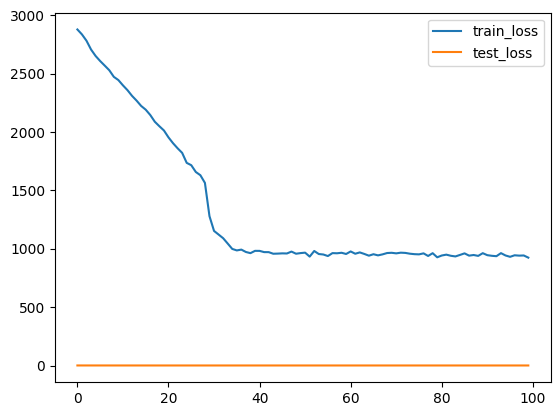

In [10]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])